## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()


W0713 13:18:34.901599  2076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 13:18:34.917599  2076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 13:18:34.920600  2076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 13:18:34.973599  2076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 13:18:34.978600  2076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 13:18:35.047600  2076 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 13:18:35.086599  2076 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.9572 - acc: 0.2950 - val_loss: 1.7628 - val_acc: 0.3749
Epoch 2/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.7152 - acc: 0.3876 - val_loss: 1.6876 - val_acc: 0.3997
Epoch 3/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.6170 - acc: 0.4233 - val_loss: 1.5650 - val_acc: 0.4442
Epoch 4/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.5539 - acc: 0.4456 - val_loss: 1.5541 - val_acc: 0.4443
Epoch 5/500
50000/50000 [==============================] - 11s 214us/step - loss: 1.5063 - acc: 0.4627 - val_loss: 1.5185 - val_acc: 0.4583
Epoch 6/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.4807 - acc: 0.4702 - val_loss: 1.4980 - val_acc: 0.4685
Epoch 7/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.4456 - acc: 0.4851 - val_l

Epoch 59/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.5419 - acc: 0.8067 - val_loss: 2.0029 - val_acc: 0.5017
Epoch 60/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.5520 - acc: 0.8028 - val_loss: 2.0221 - val_acc: 0.5125
Epoch 61/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.5318 - acc: 0.8098 - val_loss: 2.0407 - val_acc: 0.5097
Epoch 62/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.5249 - acc: 0.8106 - val_loss: 2.0375 - val_acc: 0.5090
Epoch 63/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.5123 - acc: 0.8169 - val_loss: 2.0194 - val_acc: 0.5152
Epoch 64/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.4955 - acc: 0.8220 - val_loss: 2.1428 - val_acc: 0.5037
Epoch 65/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.4912 - acc: 0.8230 - val_loss: 2.1436 - val_acc: 0.5103
Epoch 66/500


50000/50000 [==============================] - 12s 239us/step - loss: 0.2117 - acc: 0.9255 - val_loss: 3.3767 - val_acc: 0.4990
Epoch 118/500
50000/50000 [==============================] - 13s 255us/step - loss: 0.2744 - acc: 0.9022 - val_loss: 3.3598 - val_acc: 0.4969
Epoch 119/500
50000/50000 [==============================] - 12s 250us/step - loss: 0.2445 - acc: 0.9122 - val_loss: 3.3841 - val_acc: 0.5024
Epoch 120/500
50000/50000 [==============================] - 12s 250us/step - loss: 0.2509 - acc: 0.9095 - val_loss: 3.4012 - val_acc: 0.4955
Epoch 121/500
50000/50000 [==============================] - 13s 258us/step - loss: 0.2573 - acc: 0.9080 - val_loss: 3.3772 - val_acc: 0.4920
Epoch 122/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.2485 - acc: 0.9098 - val_loss: 3.4935 - val_acc: 0.4940
Epoch 123/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.2632 - acc: 0.9059 - val_loss: 3.4266 - val_acc: 0.4956
Epoch 124/500
50000/

Epoch 175/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.1459 - acc: 0.9484 - val_loss: 4.1006 - val_acc: 0.4955
Epoch 176/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.1824 - acc: 0.9338 - val_loss: 4.1269 - val_acc: 0.4940
Epoch 177/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.1765 - acc: 0.9370 - val_loss: 4.1685 - val_acc: 0.4861
Epoch 178/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.2314 - acc: 0.9202 - val_loss: 4.0747 - val_acc: 0.4942
Epoch 179/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.1617 - acc: 0.9434 - val_loss: 4.1712 - val_acc: 0.4922
Epoch 180/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.1425 - acc: 0.9491 - val_loss: 4.1120 - val_acc: 0.4910
Epoch 181/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.1230 - acc: 0.9563 - val_loss: 4.1468 - val_acc: 0.4896
Epoch 

Epoch 233/500
50000/50000 [==============================] - 11s 213us/step - loss: 0.1258 - acc: 0.9562 - val_loss: 4.6600 - val_acc: 0.4830
Epoch 234/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.1525 - acc: 0.9467 - val_loss: 4.5207 - val_acc: 0.4905
Epoch 235/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.1431 - acc: 0.9508 - val_loss: 4.5120 - val_acc: 0.4916
Epoch 236/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.1063 - acc: 0.9625 - val_loss: 4.4694 - val_acc: 0.4930
Epoch 237/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.1487 - acc: 0.9505 - val_loss: 4.5151 - val_acc: 0.4922
Epoch 238/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.1856 - acc: 0.9381 - val_loss: 4.5132 - val_acc: 0.4955
Epoch 239/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.0943 - acc: 0.9663 - val_loss: 4.5240 - val_acc: 0.4971
Epoch 

Epoch 291/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.1821 - acc: 0.9420 - val_loss: 4.8637 - val_acc: 0.4894
Epoch 292/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.1546 - acc: 0.9487 - val_loss: 4.7798 - val_acc: 0.4932
Epoch 293/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.1531 - acc: 0.9491 - val_loss: 4.8590 - val_acc: 0.4877
Epoch 294/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0570 - acc: 0.9808 - val_loss: 4.7951 - val_acc: 0.4948
Epoch 295/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0570 - acc: 0.9809 - val_loss: 4.8381 - val_acc: 0.4927
Epoch 296/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0768 - acc: 0.9733 - val_loss: 4.8412 - val_acc: 0.4878
Epoch 297/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.1675 - acc: 0.9451 - val_loss: 4.8515 - val_acc: 0.4918
Epoch 

Epoch 349/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0841 - acc: 0.9719 - val_loss: 5.0529 - val_acc: 0.4785
Epoch 350/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.2875 - acc: 0.9167 - val_loss: 4.9390 - val_acc: 0.4866
Epoch 351/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.1730 - acc: 0.9449 - val_loss: 4.9060 - val_acc: 0.4936
Epoch 352/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.0485 - acc: 0.9838 - val_loss: 4.9467 - val_acc: 0.4952
Epoch 353/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0363 - acc: 0.9880 - val_loss: 4.9555 - val_acc: 0.4966
Epoch 354/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0435 - acc: 0.9850 - val_loss: 4.9367 - val_acc: 0.4923
Epoch 355/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0334 - acc: 0.9887 - val_loss: 4.9860 - val_acc: 0.4897
Epoch 

Epoch 407/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.2018 - acc: 0.9416 - val_loss: 4.9330 - val_acc: 0.4868
Epoch 408/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0754 - acc: 0.9745 - val_loss: 5.0679 - val_acc: 0.4850
Epoch 409/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0720 - acc: 0.9747 - val_loss: 4.9881 - val_acc: 0.4871
Epoch 410/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0339 - acc: 0.9897 - val_loss: 5.0261 - val_acc: 0.4960
Epoch 411/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0354 - acc: 0.9885 - val_loss: 5.0517 - val_acc: 0.4856
Epoch 412/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.0311 - acc: 0.9902 - val_loss: 5.1532 - val_acc: 0.4880
Epoch 413/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.2033 - acc: 0.9398 - val_loss: 5.1567 - val_acc: 0.4711
Epoch 

Epoch 465/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.6566 - acc: 0.8418 - val_loss: 4.4355 - val_acc: 0.4869
Epoch 466/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.0996 - acc: 0.9667 - val_loss: 4.4691 - val_acc: 0.4922
Epoch 467/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0468 - acc: 0.9850 - val_loss: 4.5291 - val_acc: 0.4932
Epoch 468/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0236 - acc: 0.9941 - val_loss: 4.5867 - val_acc: 0.5016
Epoch 469/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0093 - acc: 0.9994 - val_loss: 4.6525 - val_acc: 0.5011
Epoch 470/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0077 - acc: 0.9995 - val_loss: 4.7191 - val_acc: 0.4999
Epoch 471/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0055 - acc: 0.9998 - val_loss: 4.7476 - val_acc: 0.5021
Epoch 4

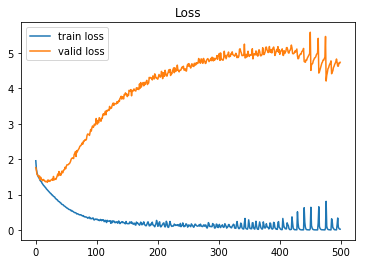

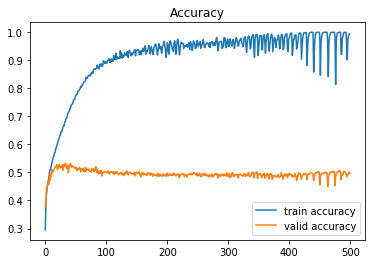

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()